# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
from selenium.webdriver.chrome.service import Service
import requests
import time

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find('table', {'class':'table'})
temp = pd.read_html(str(table))
mars_data = temp[0]
mars_data

C:\Users\andre\AppData\Local\Temp\ipykernel_19832\3051693992.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  temp = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
temp_list = []

# Loop through the scraped data to create a list of rows
rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    if cols:
        cols = [col.text.strip() for col in cols]
        temp_list.append(cols)


In [7]:
mars_data_DF = pd.DataFrame(temp_list, columns = ['ID', 'Terrestrial Date', 'Sol', 'LS', 'Month', 'Min Temp (C)', 'Pressure'])
mars_data_DF.head()

,ID,Terrestrial Date,Sol,LS,Month,Min Temp (C),Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
# Confirm DataFrame was created successfully
print(mars_data_DF.head())


   ID Terrestrial Date Sol   LS Month Min Temp (C) Pressure
0   2       2012-08-16  10  155     6        -75.0    739.0
1  13       2012-08-17  11  156     6        -76.0    740.0
2  24       2012-08-18  12  156     6        -76.0    741.0
3  35       2012-08-19  13  157     6        -74.0    732.0
4  46       2012-08-20  14  157     6        -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1867 non-null   object
 1   Terrestrial Date  1867 non-null   object
 2   Sol               1867 non-null   object
 3   LS                1867 non-null   object
 4   Month             1867 non-null   object
 5   Min Temp (C)      1867 non-null   object
 6   Pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [10]:
# Change data types for data analysis
mars_data_DF['Terrestrial Date'] = pd.to_datetime(mars_data_DF['Terrestrial Date'])  
mars_data_DF['Sol'] = mars_data_DF['Sol'].astype('int32') 
mars_data_DF['LS'] = mars_data_DF['LS'].astype('int32') 
mars_data_DF['Month'] = mars_data_DF['Month'].astype('int32') 
mars_data_DF['Min Temp (C)'] = mars_data_DF['Min Temp (C)'].astype('float64') 
mars_data_DF['Pressure'] = mars_data_DF['Pressure'].astype('float64')

In [11]:
# Confirm type changes were successful by examining data types again
mars_data_DF.dtypes

ID                          object
Terrestrial Date    datetime64[ns]
Sol                          int32
LS                           int32
Month                        int32
Min Temp (C)               float64
Pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
mars_data_DF.Month.nunique()

12

In [13]:
# 2. How many Martian days' worth of data are there?
mars_data_DF.Sol.nunique()

1867

In [14]:
# 3. What is the average low temperature by month?
average_temp_by_month = mars_data_DF.groupby('Month')['Min Temp (C)'].mean()
average_temp_by_month

Month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: Min Temp (C), dtype: float64

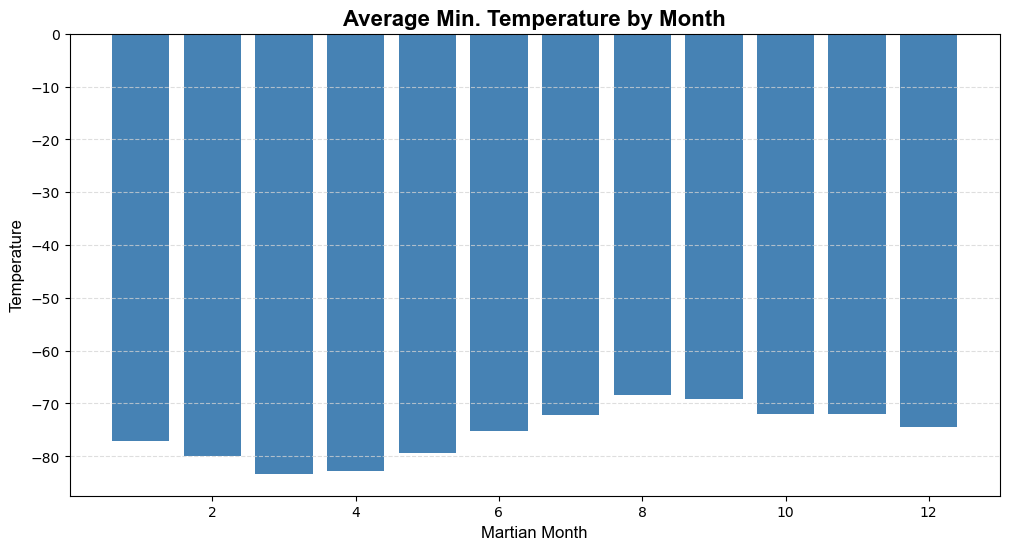

In [15]:
# Plot the average temperature by month
average_temp_by_month = mars_data_DF.groupby('Month')['Min Temp (C)'].mean()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(average_temp_by_month.index, average_temp_by_month.values, color="steelblue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Average Min. Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location
# Sort the average temperature by month in ascending order
sorted_temp_by_month = average_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_temp_by_month.idxmin() 
hottest_month = sorted_temp_by_month.idxmax()

print(coldest_month, hottest_month)

3 8


In [17]:
# 4. Average pressure by Martian month
avg_pressure = mars_data_DF.groupby('Month')['Pressure'].mean()
print(avg_pressure)

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64


In [18]:
# Plot the average pressure by month
mars_data_DF.groupby("Month")["Pressure"].mean()

Month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: Pressure, dtype: float64

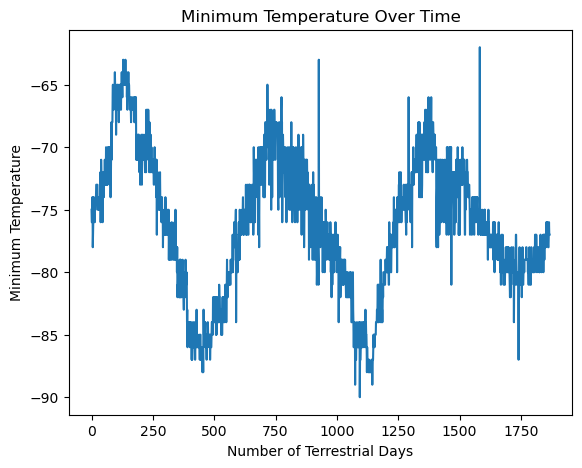

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.figure(figsize=(6.5, 5))
plt.plot(mars_data_DF.index, mars_data_DF['Min Temp (C)'])
plt.title('Minimum Temperature Over Time')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_data_DF.to_csv('mars_weather_data.csv', index=False)

print("Data has been saved to 'mars_weather_data.csv'.")

Data has been saved to 'mars_weather_data.csv'.


In [22]:
browser.quit()